# Predicting the number of sales

Let's load our data

In [3]:
train<-read.csv('train.csv')
test<-read.csv('test.csv')

Let's take a look at data

In [23]:
head(train)

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.300,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.920,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.500,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.200,Regular,0.00000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
NCD19,8.930,Low Fat,0.00000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.00000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [14]:
attach(train)

In [25]:
options(warn=-1)

In [26]:
library(dplyr)

I first create the simpleset model based on only two variables and linear model. Why not make use of the other variables you ask? Or even create new features? Because all the information is encoded into the store and item variables, the other features can be inferred from these 2 variables. It is a rookie mistake in data science to add colinear features and degrade performance.

In [27]:
model1 = lm(Item_Outlet_Sales~Item_Identifier+Outlet_Identifier)

In [29]:
library(Metrics)
rmse(Item_Outlet_Sales, model1$fitted.values)

[1] 1019.145

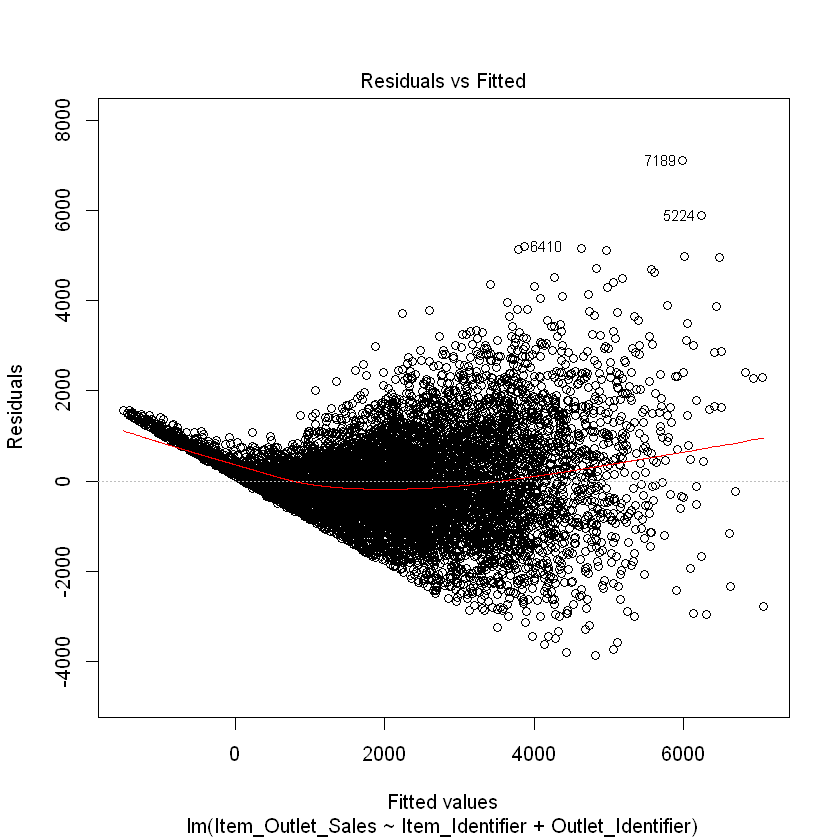

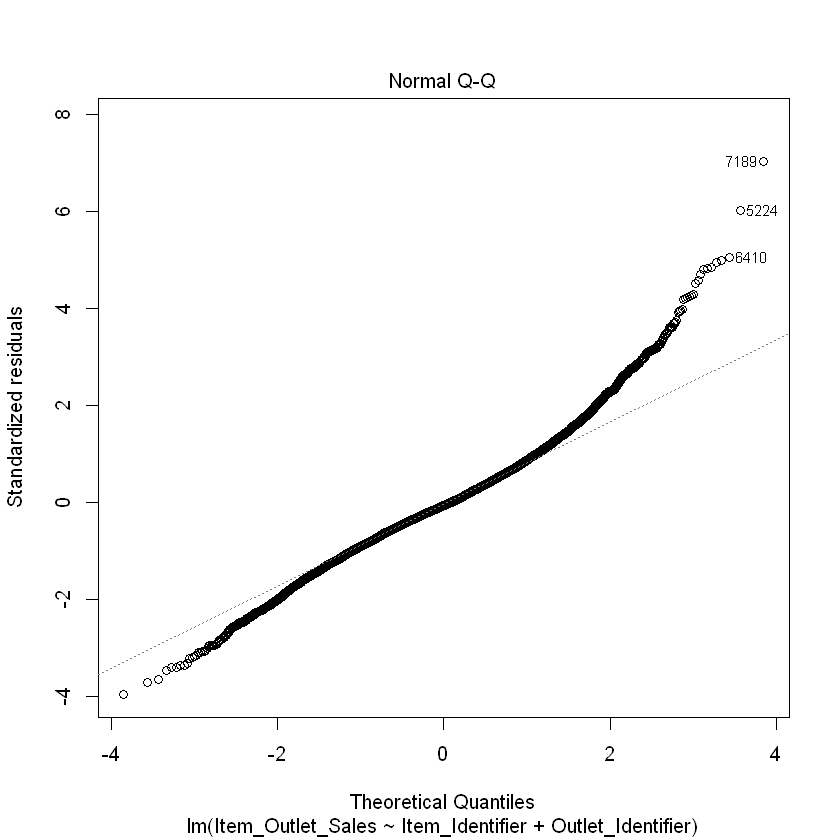

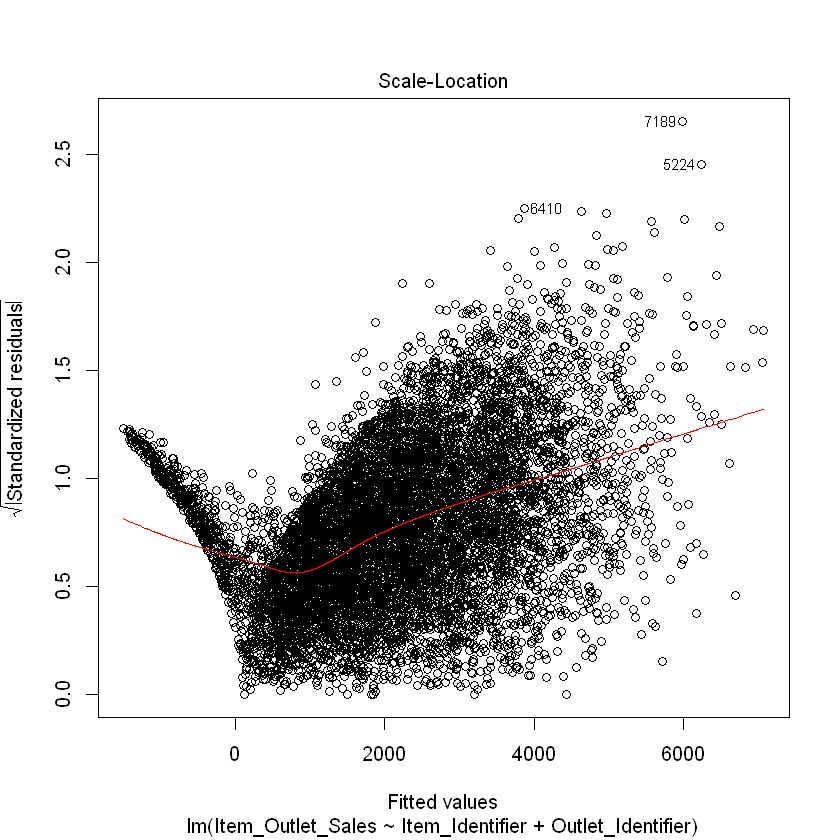

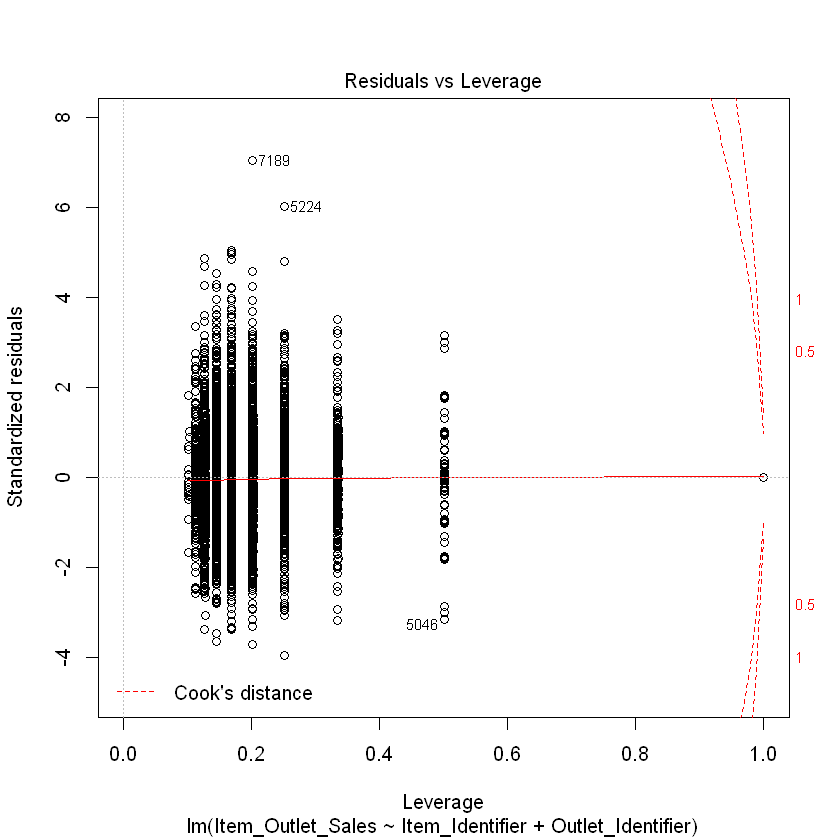

In [30]:
plot(model1)

As you can see we have huge residuals for large and small target values. Lets use the log of target value to address this

In [31]:
model2 = lm(log(Item_Outlet_Sales)~Item_Identifier+Outlet_Identifier)

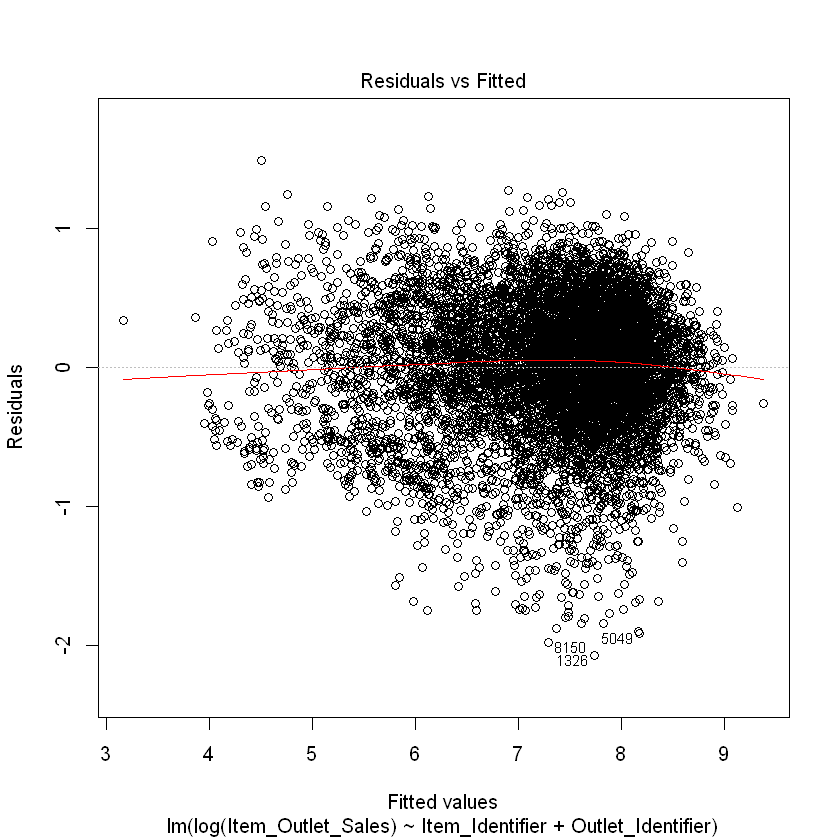

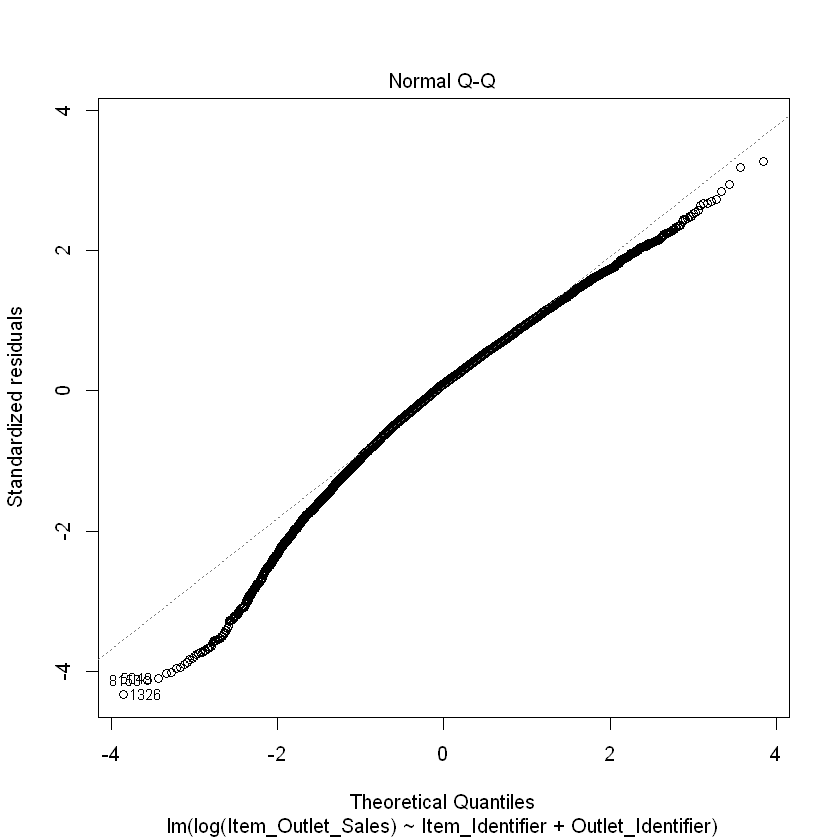

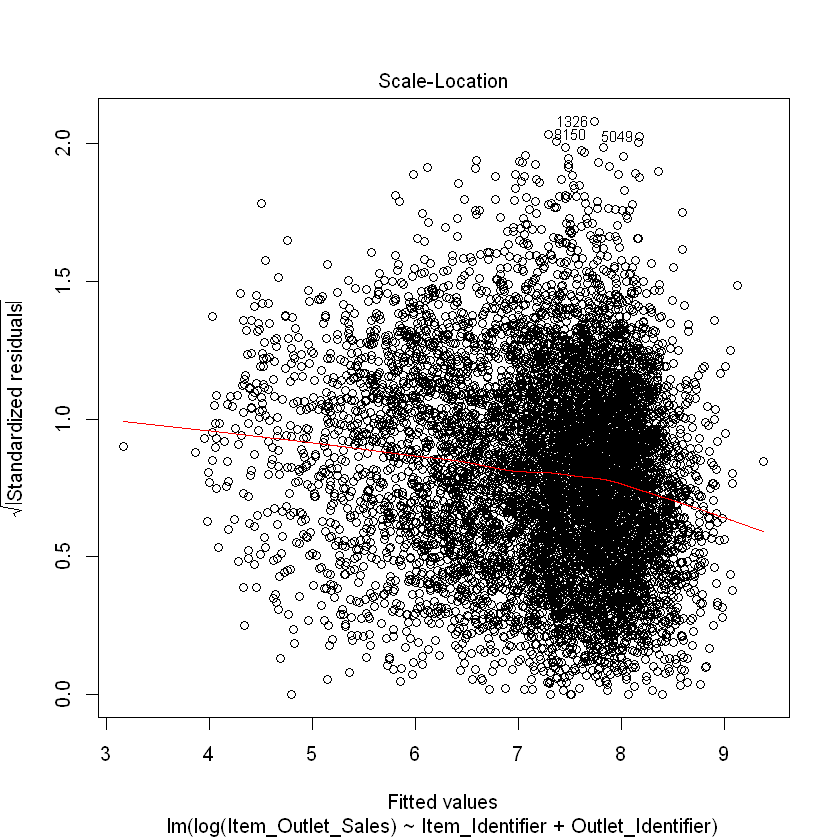

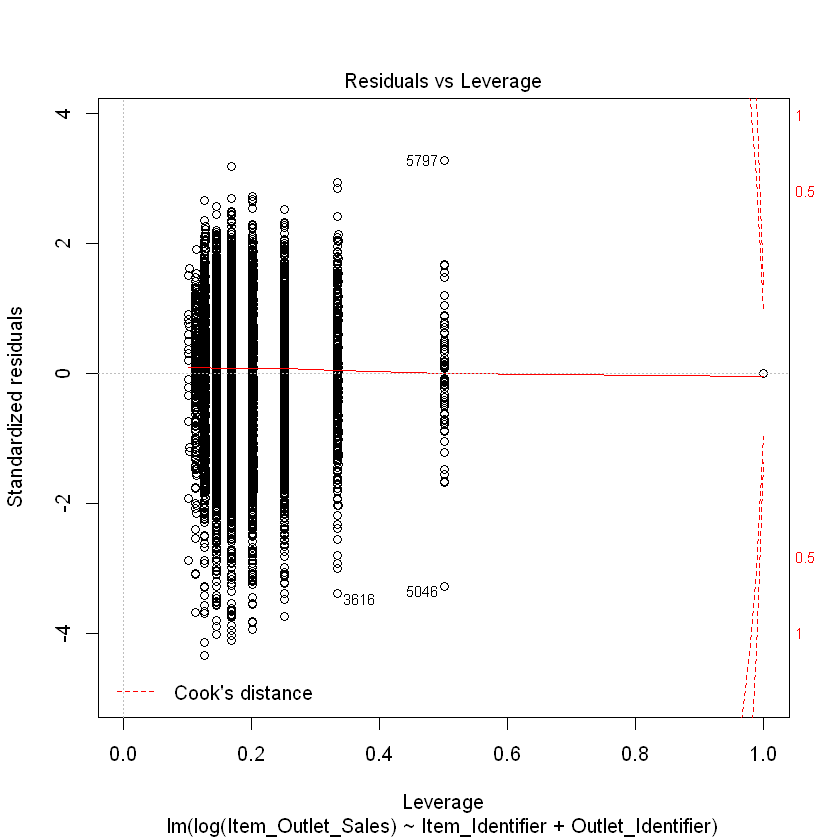

In [32]:
plot(model)

In [22]:
rmse(Item_Outlet_Sales, exp(model2$fitted.values))

[1] 1001.258

The performance is improved but the QQplot tells me we need nonlinear model to better model the data